## Data Visualization
Visualizing the data to observe the distribution and effect of outlier removal.

In [115]:
import pandas as pd
import numpy as np
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset
Read the dataset into a Pandas DataFrame.

In [117]:
# Load data from a CSV file
df=pd.read_csv("placement1.csv")

In [119]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


## Data Visualization
Visualizing the data to observe the distribution and effect of outlier removal.

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

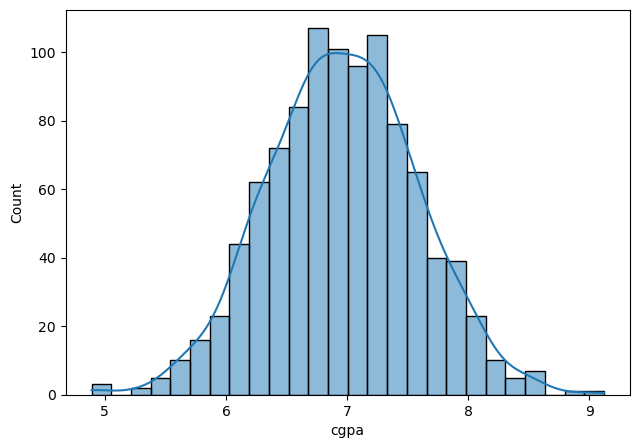

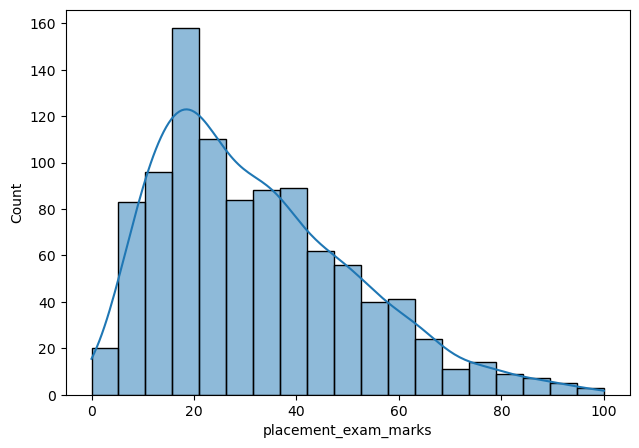

In [121]:

plt.figure(figsize=(16,5))
# Visualize the data
plt.subplot(1,2,1)
# Visualize the data
sns.histplot(df['cgpa'], kde=True)

plt.figure(figsize=(16,5))
# Visualize the data
plt.subplot(1,2,2)
# Visualize the data
sns.histplot(df['placement_exam_marks'],kde=True)

## Data Visualization
Visualizing the data to observe the distribution and effect of outlier removal.

<Axes: xlabel='placement_exam_marks'>

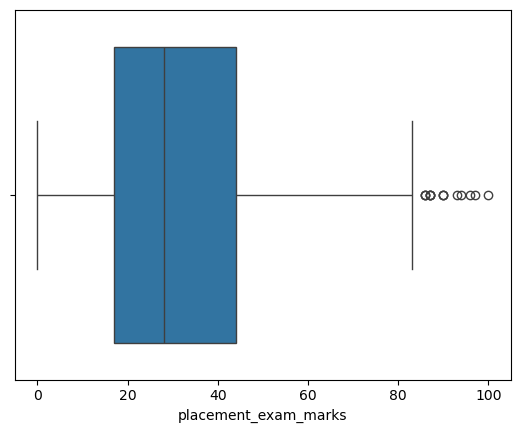

In [122]:
# Visualize the data
sns.boxplot(x="placement_exam_marks",data=df)

## Outlier Detection with Percentile Method
Using percentile thresholds to identify and remove outliers.

In [125]:
# Calculate the percentile-based thresholds for outlier detection
percentile25 = df['placement_exam_marks'].quantile(0.25)
# Calculate the percentile-based thresholds for outlier detection
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [127]:
percentile25,percentile75

(17.0, 44.0)

In [129]:
iqr = percentile75 - percentile25
iqr

27.0

In [131]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [47]:
#df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [57]:
#df=df[df['placement_exam_marks'] < upper_limit]

In [59]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [133]:
new_df_cap=df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks']<lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)

## Data Visualization
Visualizing the data to observe the distribution and effect of outlier removal.

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_20120\2182126619.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_20120\2182126619.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_

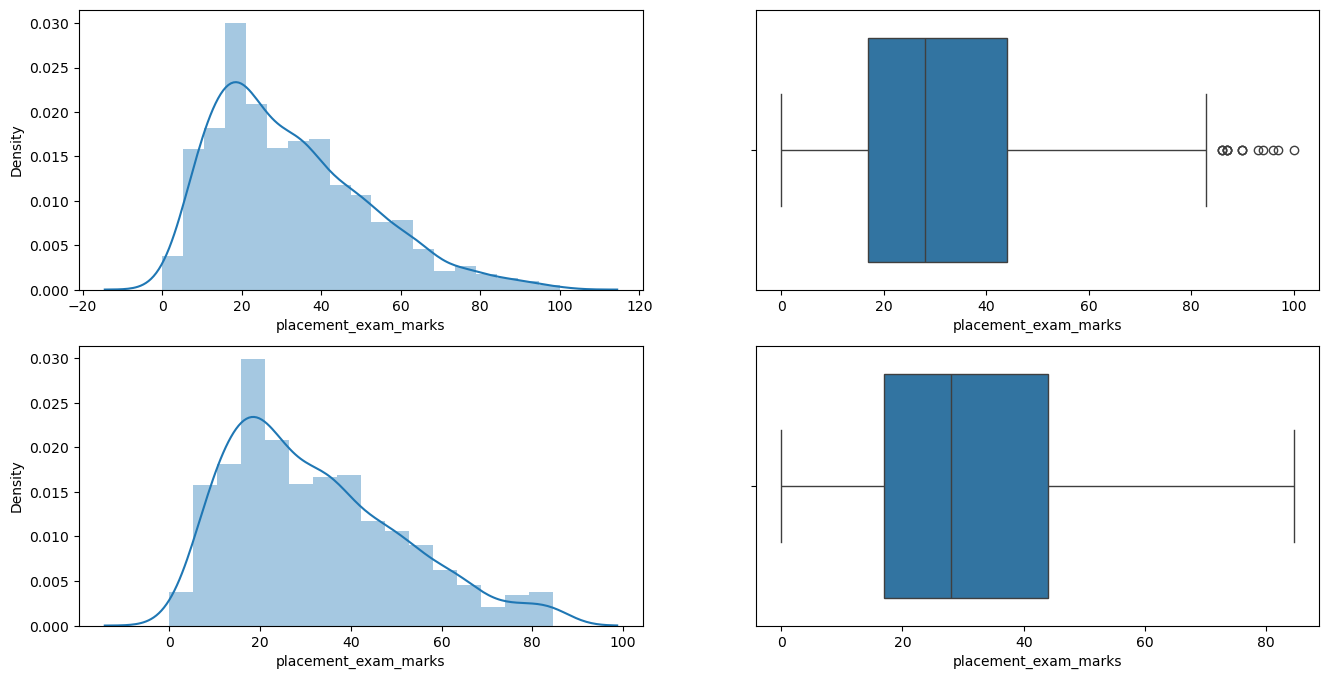

In [136]:
plt.figure(figsize=(16,8))
# Visualize the data
plt.subplot(2,2,1)
# Visualize the data
sns.distplot(df['placement_exam_marks'])

# Visualize the data
plt.subplot(2,2,2)
# Visualize the data
sns.boxplot(x='placement_exam_marks',data=df)

# Visualize the data
plt.subplot(2,2,3)
# Visualize the data
sns.distplot(new_df_cap['placement_exam_marks'])

# Visualize the data
plt.subplot(2,2,4)
# Visualize the data
sns.boxplot(x='placement_exam_marks',data=new_df_cap)

plt.show()